In [1]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
import corner
from jnkepler.jaxttv import * # develop/feature-nontransiting
from jnkepler.jaxttv.utils import elements_to_pdic, params_to_elements
from jax.config import config
import numpyro, jax
config.update('jax_enable_x64', True)
numpyro.set_platform('cpu')

In [2]:
import seaborn as sns
sns.set(style='ticks', font_scale=1.6, font='times')
plt.rcParams["figure.figsize"] = (12,6)
from matplotlib import rc
rc('text', usetex=True)

In [3]:
# Kepler/HST + JWST + Hubble DDT data
d = pd.read_csv("../data/tc_space.csv", comment='#')

In [4]:
p_init = [45.1553024, 85.316894, 130.174997]
dt = p_init[0] / 25.
t_start, t_end = 155., 5425.
jttv = JaxTTV(t_start, t_end, dt) # jaxttv class

In [5]:
tcobs = [jnp.array(d.tc[d.planet==j]) for j in range(3)] 
errorobs = [jnp.array(d.tcerr[d.planet==j]) for j in range(3)]

In [6]:
jttv.set_tcobs(tcobs, p_init, errorobs=errorobs, print_info=True)

# integration starts at:           155.00
# first transit time in data:      159.11
# last transit time in data:       5419.02
# integration ends at:             5425.00
# integration time step:           1.8062 (1/25 of innermost period)


## high-mass solution (Kepler + HST + JWST + HST DD)

initial objective function: 746007724.96 (61 data)

running optimization...
objective function: 53.95 (61 data)
# elapsed time (least square): 34.2 sec


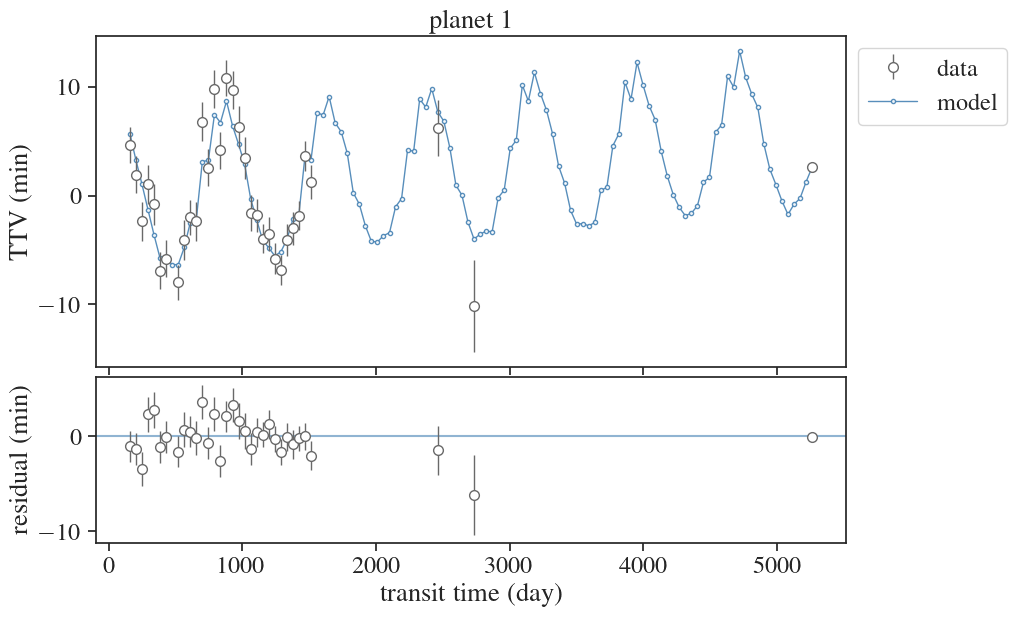

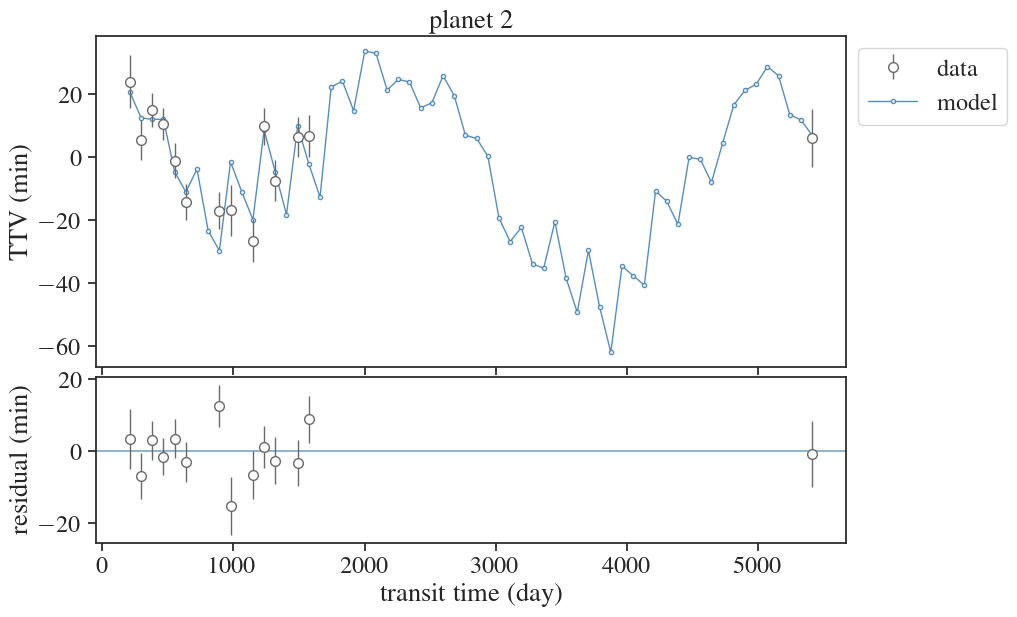

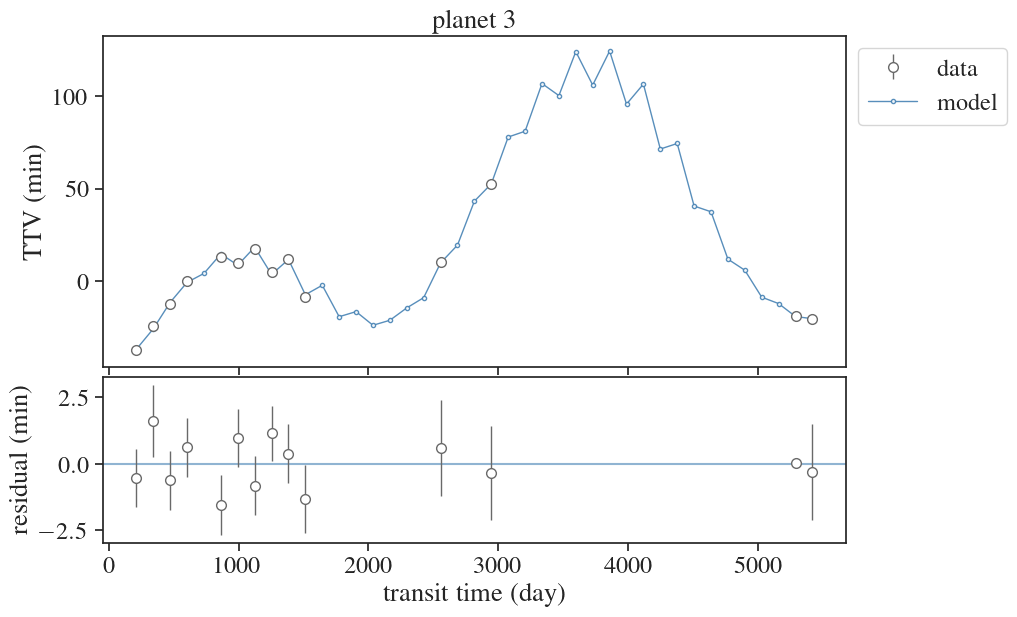

In [7]:
ntp = {'period': [250., 270.], 'ecosw': [-0.2, 0.2], 'esinw': [-0.2, 0.2], 'cosi': [-1e-6, 1e-6], 'lnode': [-1e-6, 1e-6], 'tc': [t_start, t_start+2*p_init[-1]], 'mass': [3e-5, 3e-4]}
params_best_high, pdic_high = jttv.optim(mmin=1e-5, mmax=1e-3, emax=0.05, nontransiting_planet=ntp)

In [8]:
pd.DataFrame(pdic_high)

,pmass,period,ecosw,esinw,cosi,lnode,tic,ecc,omega,lnmass,mass,cosw,sinw
0,8.456835,45.154047,-0.007661,0.003600,0.0,0.0,159.110407,0.008465,2.702253,-10.580761,0.000025,-0.766075,0.360035
1,6.753687,85.313955,0.019273,0.001324,-0.0,-0.0,210.005330,0.019319,0.068574,-10.805647,0.000020,0.997650,0.068520
2,7.444263,130.179340,0.014159,0.001869,-0.0,-0.0,212.028008,0.014282,0.131259,-10.708292,0.000022,0.991398,0.130882
3,19.534093,261.181877,0.034080,0.057334,0.0,-0.0,285.822637,0.066698,1.034499,-9.743575,0.000059,0.510956,0.859607


In [9]:
elements, masses = params_to_elements(params_best_high, 4)
tc_high = jttv.get_ttvs(elements, masses)[0]

## low-mass solution (Kepler + HST + JWST + HST DD)

initial objective function: 5928115.84 (61 data)

running optimization...
objective function: 50.35 (61 data)
# elapsed time (least square): 16.0 sec


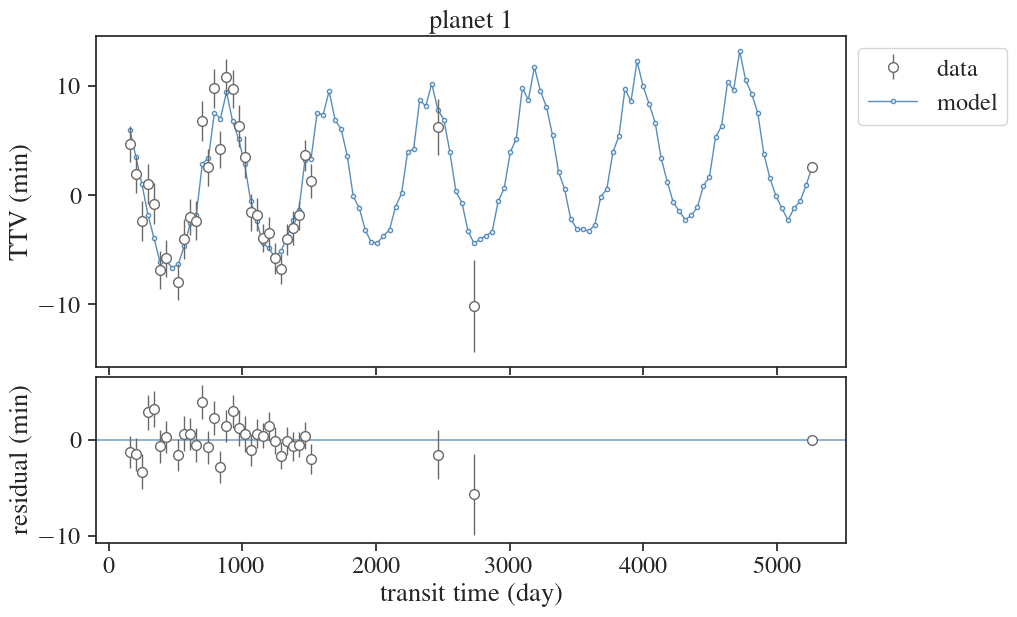

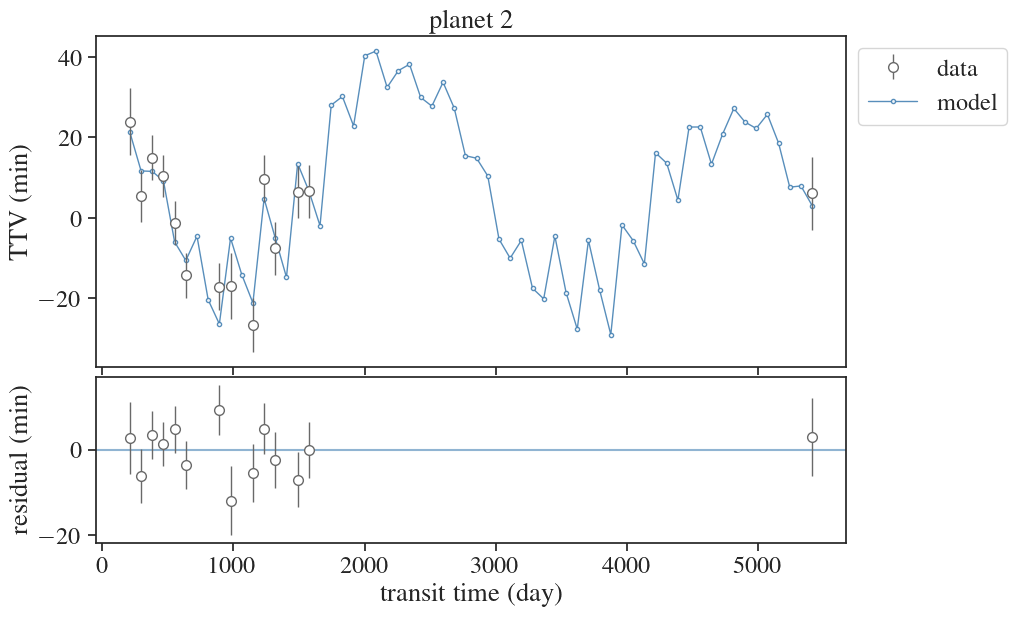

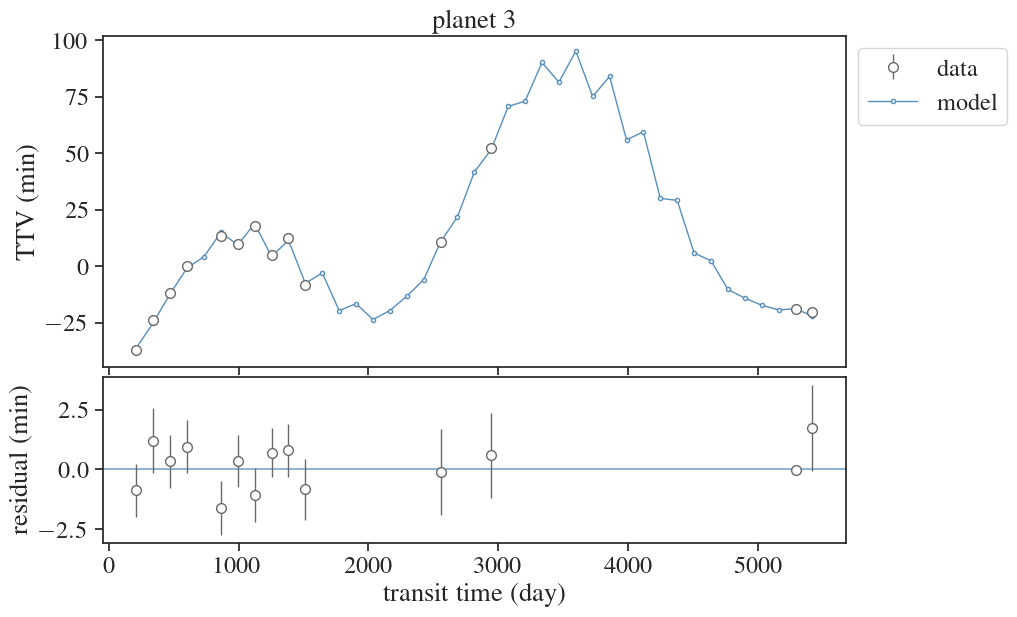

In [10]:
ntp = {'period': [250., 270.], 'ecosw': [-0.1, 0.1], 'esinw': [-0.1, 0.1], 'cosi': [-1e-6, 1e-6], 'lnode': [-1e-6, 1e-6], 'tc': [t_start, t_start+2*p_init[-1]], 'mass': [1e-6, 1e-4]}
params_best_low, pdic_low = jttv.optim(mmin=1e-6, mmax=1e-4, emax=0.05, nontransiting_planet=ntp)

In [11]:
pd.DataFrame(pdic_low)

,pmass,period,ecosw,esinw,cosi,lnode,tic,ecc,omega,lnmass,mass,cosw,sinw
0,3.261525,45.153749,-0.009668,-0.000054,-0.0,-0.0,159.110607,0.009668,-3.135984,-11.533541,0.000010,-0.966774,-0.005422
1,6.093572,85.312931,0.027462,0.005814,0.0,-0.0,210.008482,0.028070,0.208625,-10.908501,0.000018,0.978317,0.207115
2,6.997864,130.182397,0.019138,0.005752,-0.0,0.0,212.025083,0.019984,0.291961,-10.770131,0.000021,0.957681,0.287831
3,3.034562,261.528524,-0.030433,-0.023087,0.0,-0.0,293.431555,0.038199,-2.492612,-11.605669,0.000009,-0.796700,-0.604375


In [12]:
elements, masses = params_to_elements(params_best_low, 4)
tc_low = jttv.get_ttvs(elements, masses)[0]

## How they compare with the full dataset?

In [14]:
# all data including ground-based transits
d = pd.read_csv("../data/tc_all_webb-b.csv", comment='#')
jttv2 = JaxTTV(t_start, t_end, dt) # jaxttv class

In [15]:
tcobs = [jnp.array(d.tc[d.planet==j]) for j in range(3)] 
errorobs = [jnp.array(d.tcerr[d.planet==j]) for j in range(3)]

In [16]:
jttv2.set_tcobs(tcobs, p_init, errorobs=errorobs, print_info=True)

# integration starts at:           155.00
# first transit time in data:      159.11
# last transit time in data:       5419.02
# integration ends at:             5425.00
# integration time step:           1.8062 (1/25 of innermost period)


## high-mass model plots

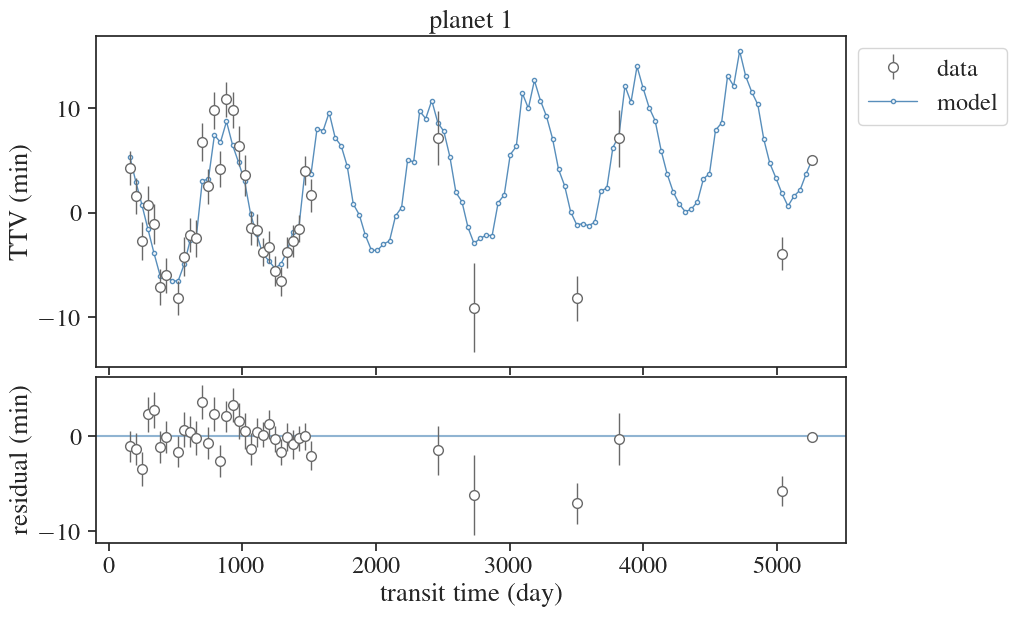

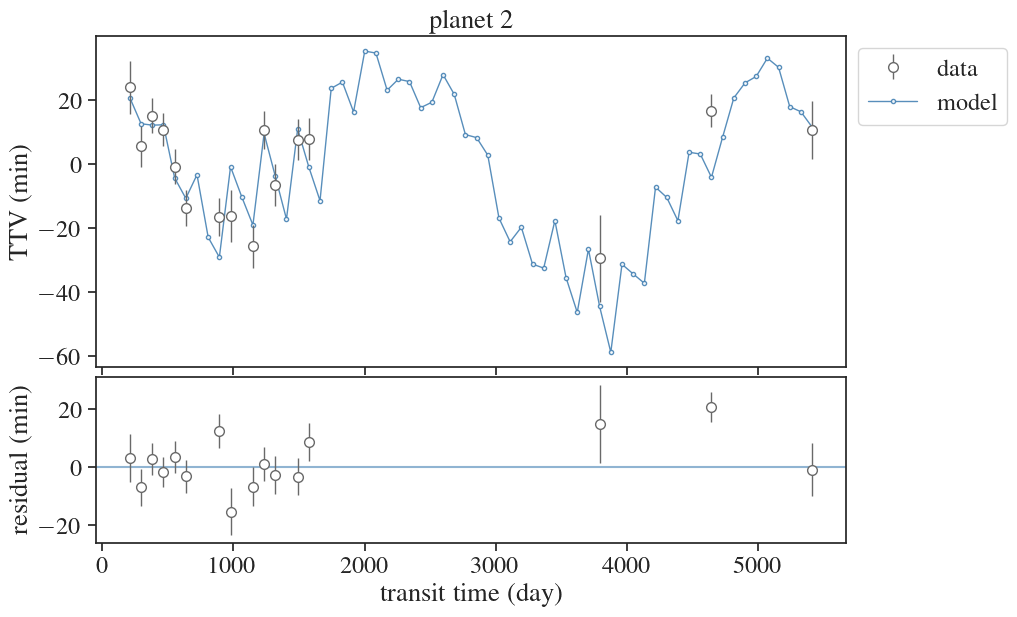

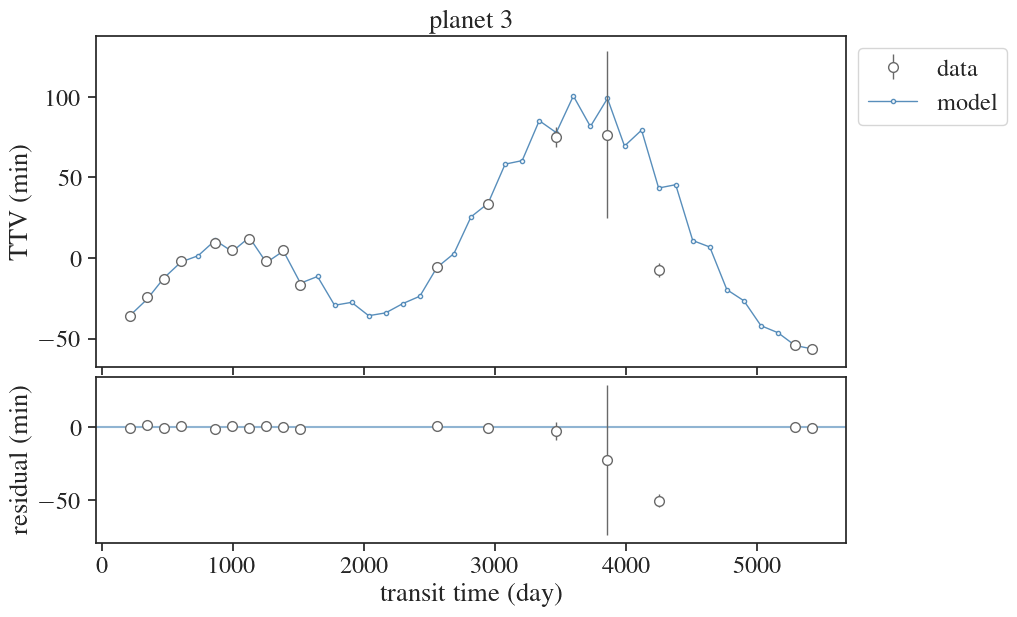

In [17]:
elements, masses = params_to_elements(params_best_high, 4)
t0_lin, p_lin = jttv2.linear_ephemeris()
tc_high, _ = jttv2.get_ttvs_nodata(elements, masses)
plot_model(tc_high, jttv2.tcobs, jttv2.errorobs, t0_lin, p_lin, marker='.')

### error distribution

sample: 100%|████████████████████████| 1000/1000 [00:02<00:00, 386.41it/s, 3 steps of size 5.62e-01. acc. prob=0.93]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
      lndf      0.89      0.34      0.89      0.32      1.44    162.42      1.01
     lnvar     -0.42      0.34     -0.39     -0.97      0.14    113.24      1.02

Number of divergences: 0
# chi-squared: 224.62833090182113


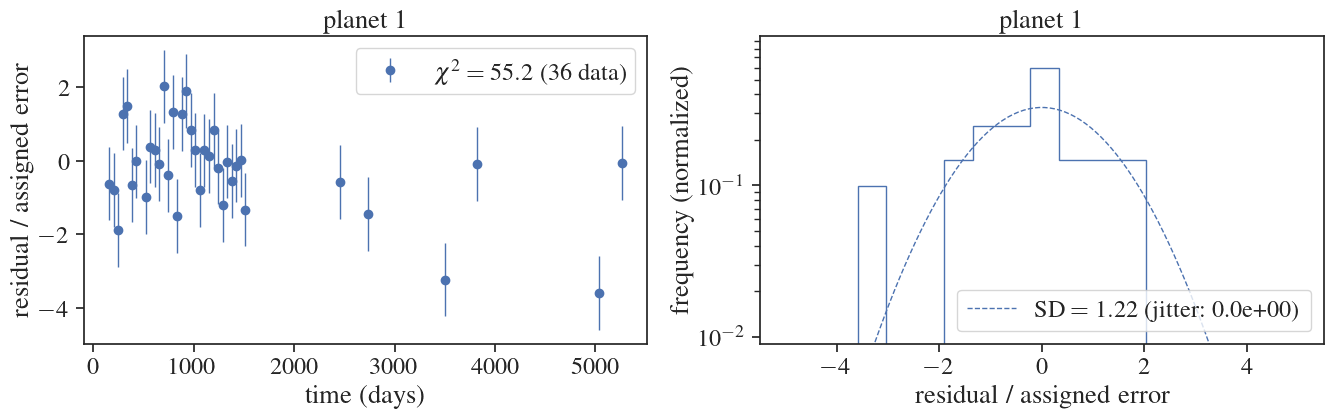

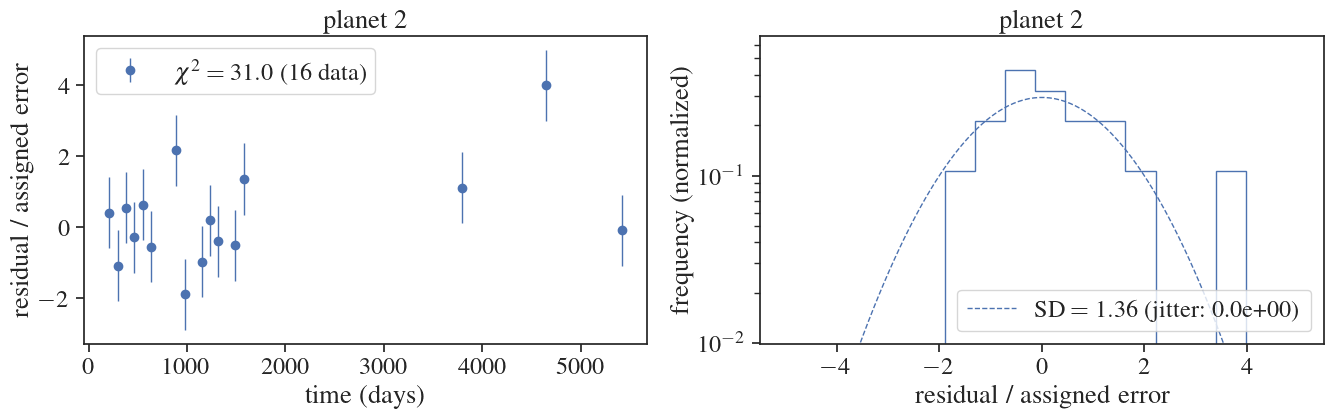

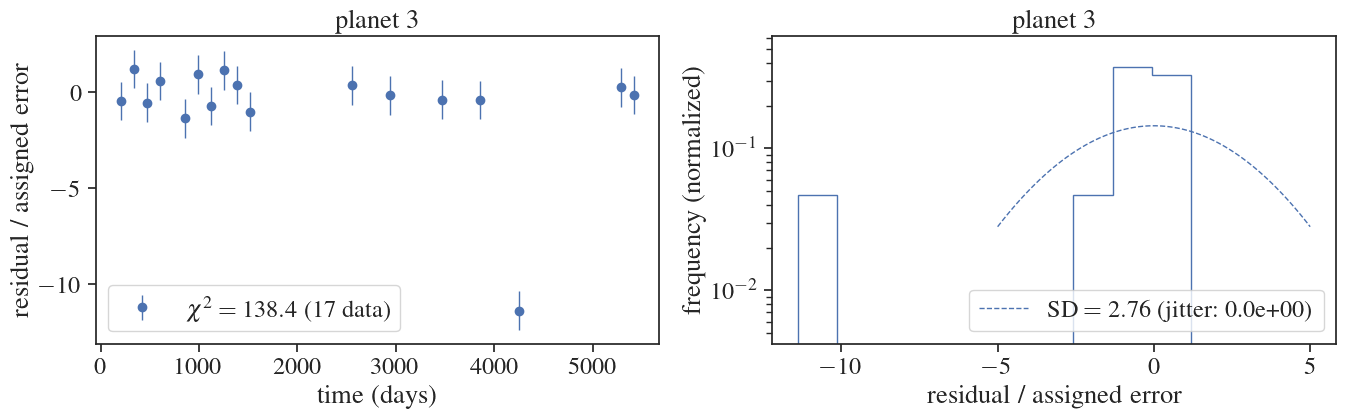

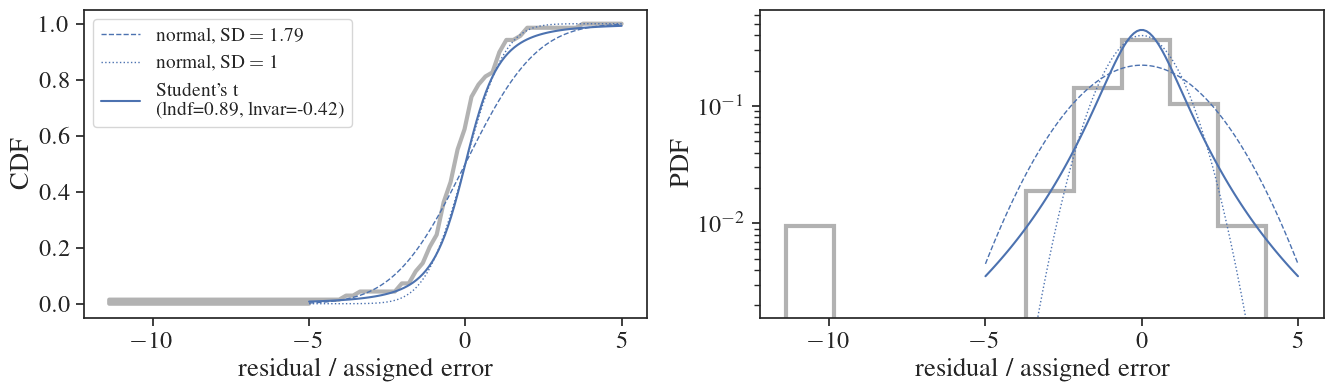

In [18]:
tc_high = jttv2.get_ttvs(elements, masses)[0]
jttv2.check_residuals(tc_high)
print ('# chi-squared:', np.sum((tc_high-jttv2.tcobs_flatten)**2/jttv2.errorobs_flatten**2))

## low-mass model plots

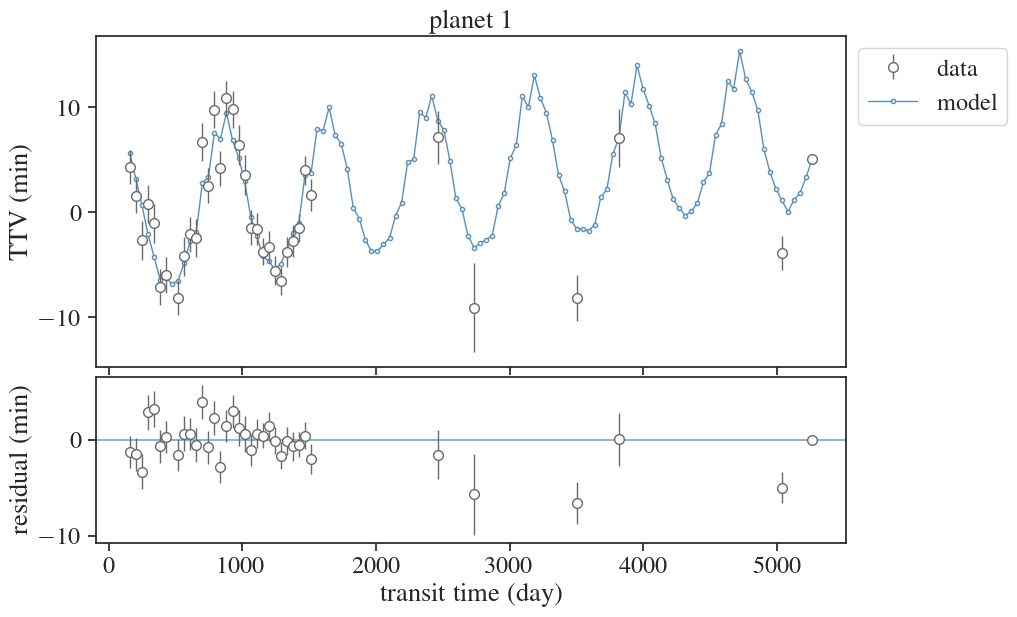

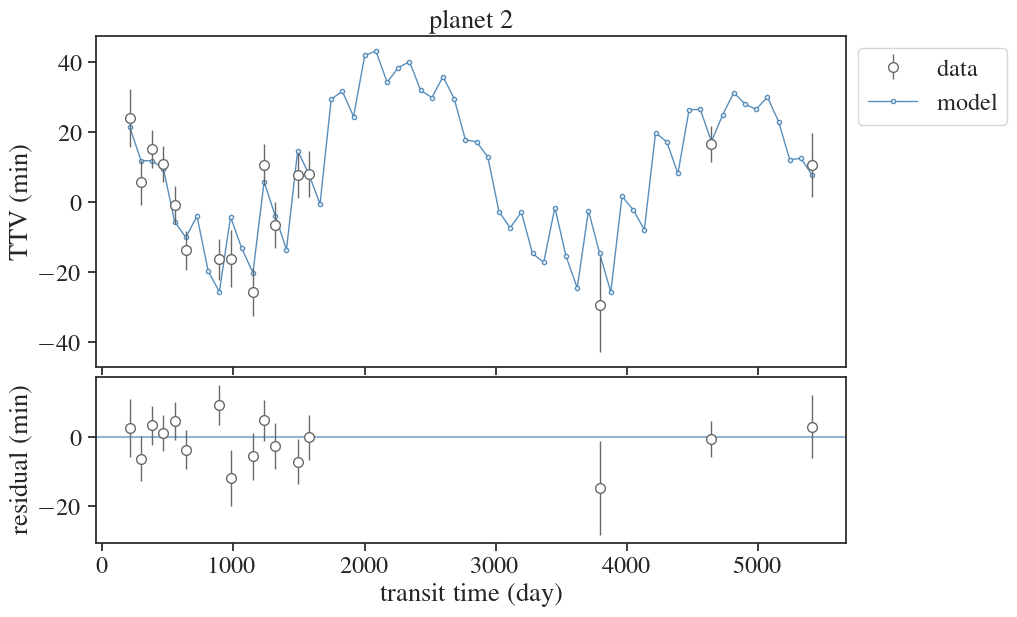

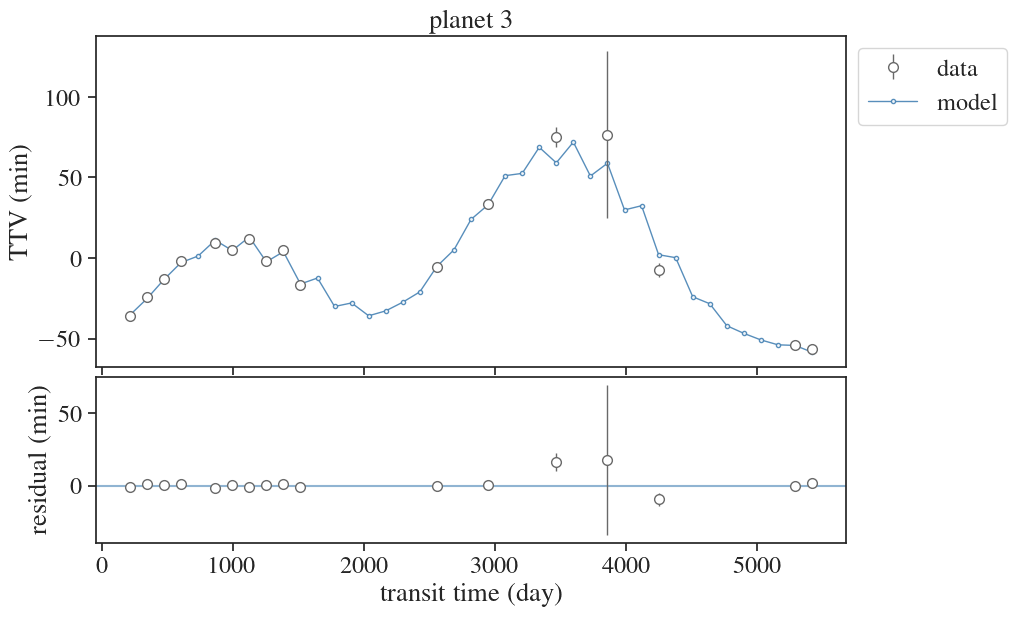

In [19]:
elements, masses = params_to_elements(params_best_low, 4)
t0_lin, p_lin = jttv2.linear_ephemeris()
tcall, _ = jttv2.get_ttvs_nodata(elements, masses)
plot_model(tcall, jttv2.tcobs, jttv2.errorobs, t0_lin, p_lin, marker='.')

sample: 100%|████████████████████████| 1000/1000 [00:02<00:00, 402.45it/s, 7 steps of size 4.63e-01. acc. prob=0.93]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
      lndf      2.70      0.92      2.60      1.31      4.30     79.71      1.00
     lnvar     -0.01      0.24      0.00     -0.37      0.40    147.00      1.00

Number of divergences: 0
chi squared: 82.15264391327679


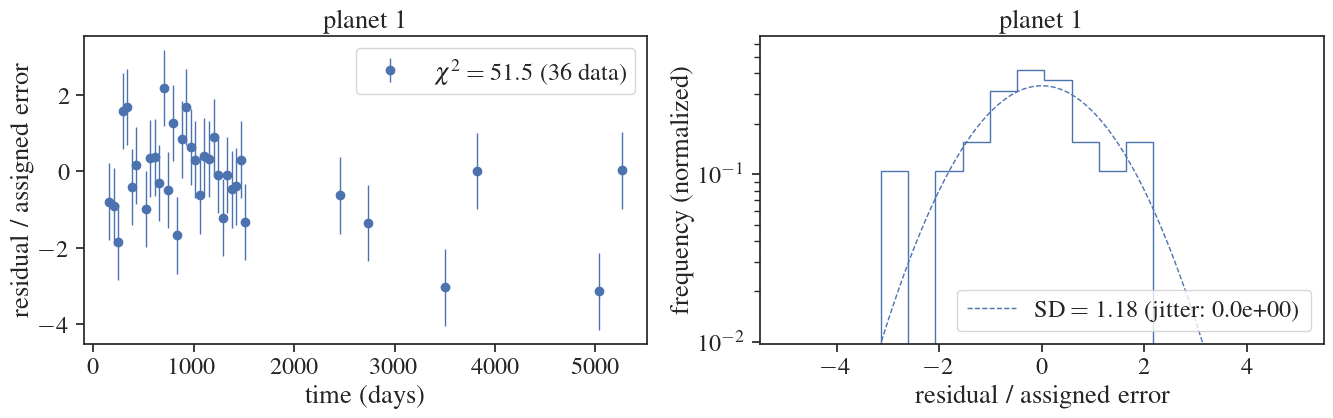

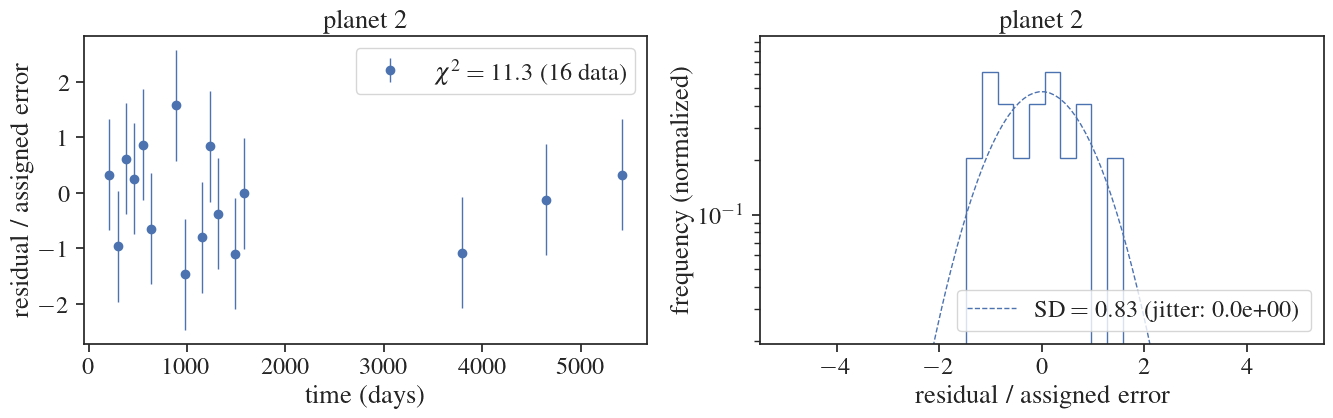

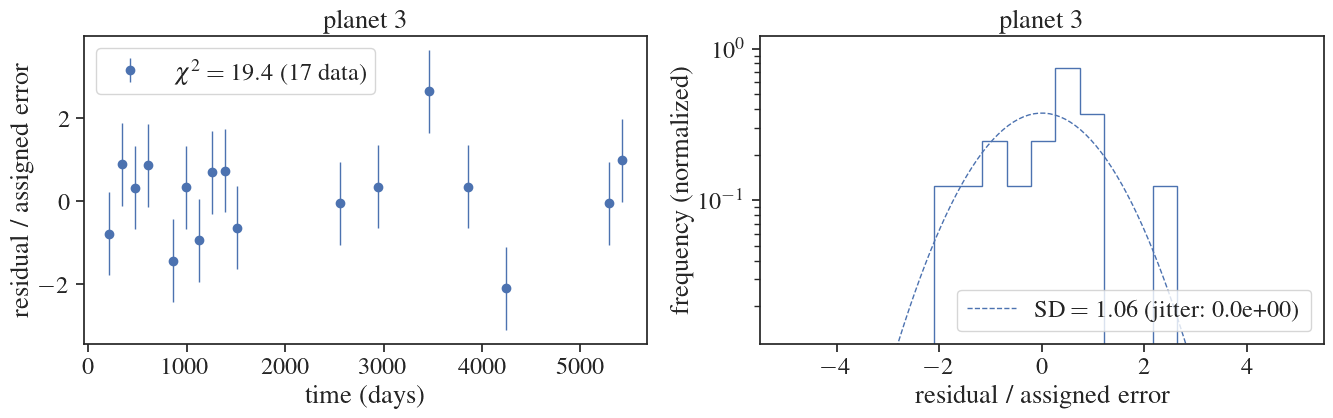

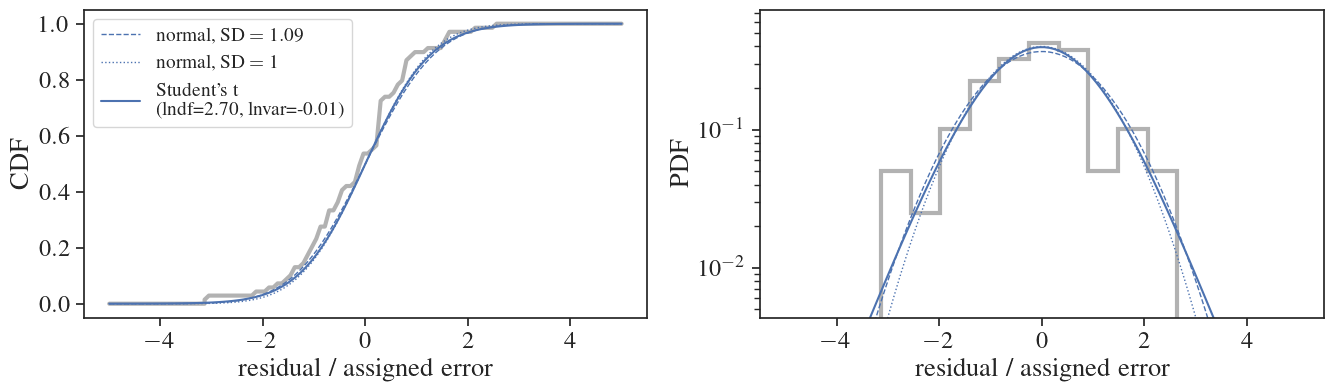

In [20]:
tc_low = jttv2.get_ttvs(elements, masses)[0]
jttv2.check_residuals(tc_low)
print ("chi squared:", np.sum((tc_low-jttv2.tcobs_flatten)**2/jttv2.errorobs_flatten**2))

### ttvfast parameters

In [21]:
from jnkepler.jaxttv.utils import convert_elements, findidx_map
from jnkepler.jaxttv.ttvfastutils import *

In [22]:
def ttvfast_params(params, num_planets, names=["period", "eccentricity", "inclination", "argument", "longnode", "mean_anomaly"]):
    elements, masses = convert_elements(*params_to_elements(params, num_planets), t_start, WHsplit=True)
    pdic = {}
    for j in range(num_planets):
        pdic['planet_mass%d'%j] = masses[j+1]
        for i,n in enumerate(names):
            pdic[n+"%d"%j] = elements[i+1,j]
    pdic['star_mass'] = masses[0]
    pdic['num_planets'] = num_planets
    for key in pdic.keys():
        if "inclination" in key or "argument" in key or "node" in key or "anomaly" in key:
            pdic[key] = np.rad2deg(pdic[key])
    df = pd.DataFrame(data=[pdic])
    return df

In [23]:
params_high_ttvfast = ttvfast_params(params_best_high, 4)
params_low_ttvfast = ttvfast_params(params_best_low, 4)

In [26]:
params_high_ttvfast.to_csv("ttvfast_highmass.csv", index=False)
params_low_ttvfast.to_csv("ttvfast_lowmass.csv", index=False)